In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px

In [20]:
all_data = pd.read_csv('./data/fifa/all_players.csv')
female_players = pd.read_csv('./data/fifa/female_players.csv')
male_players = pd.read_csv('./data/fifa/male_players.csv')

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_23565/2968712607.py:1: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.



In [21]:
all_data.columns

Index(['Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing',
       'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot',
       'Height', 'Weight', 'Alternative positions', 'Age', 'Nation', 'League',
       'Team', 'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [22]:
#Del the first column
all_data.drop(['Unnamed: 0', 'Height', 'Weight', 'Alternative positions', 'play style', 'url'], axis = 1, inplace= True)
female_players.drop('Unnamed: 0', axis = 1, inplace= True)
male_players.drop('Unnamed: 0', axis = 1, inplace= True)

all_data

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Right,25,France,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Right,28,Spain,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Left,24,Norway,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Right,21,England,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,Right,18,England,Barclays WSL,Spurs,NaN,NaN,NaN,NaN,NaN
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,Right,22,Spain,Liga F,Granada CF,NaN,NaN,NaN,NaN,NaN
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,Right,23,United States,Scottish Women's League,Glasgow City FC,NaN,NaN,NaN,NaN,NaN
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,NaN,NaN,NaN,NaN


In [23]:
all_data['Position'].value_counts()

Position
CB     3185
ST     2425
CM     2139
GK     1999
CDM    1447
RB     1404
LB     1333
LM     1035
CAM    1024
RM      961
RW      402
LW      383
Name: count, dtype: int64

In [24]:
goalies = all_data[all_data['Position'] == 'GK']
goalies

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
8,13,Gianluigi Donnarumma,89,90,84,73,90,52,87,50,...,Right,25,Italy,Ligue 1 McDonald's,Paris SG,90.0,84.0,73.0,87.0,90.0
9,15,Alisson,89,86,85,85,89,56,90,60,...,Right,31,Brazil,Premier League,Liverpool,86.0,85.0,85.0,90.0,89.0
10,16,Thibaut Courtois,89,85,89,76,90,46,88,42,...,Left,32,Belgium,LALIGA EA SPORTS,Real Madrid,85.0,89.0,76.0,88.0,90.0
13,21,Marc-André ter Stegen,89,86,85,89,91,47,86,45,...,Right,32,Germany,LALIGA EA SPORTS,FC Barcelona,86.0,85.0,89.0,86.0,91.0
21,33,Ederson,88,87,82,91,87,64,86,64,...,Left,31,Brazil,Premier League,Manchester City,87.0,82.0,91.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,15274,Alizée Flagellat,59,64,60,62,58,42,51,38,...,Right,20,France,Arkema PL,Paris FC,64.0,60.0,62.0,51.0,58.0
17701,15274,Safia Middleton-Patel,59,59,59,57,59,49,58,50,...,Right,19,Wales,Barclays WSL,Manchester Utd,59.0,59.0,57.0,58.0,59.0
17702,15274,Anne Moll,59,63,60,57,62,48,55,47,...,Right,19,Germany,GPFBL,Leverkusen,63.0,60.0,57.0,55.0,62.0
17720,16153,Eleanor Heeps,57,57,59,54,59,40,53,40,...,Right,21,England,Barclays WSL,Spurs,57.0,59.0,54.0,53.0,59.0


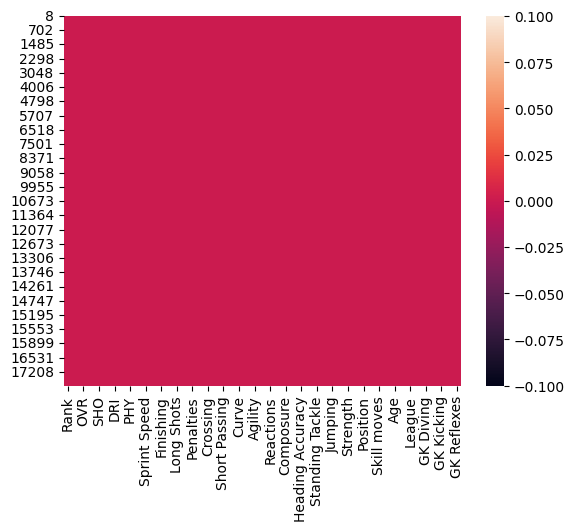

In [25]:
sns.heatmap(goalies.isnull())
plt.show()

In [26]:
all_data = all_data[all_data['Position'] != 'GK']
all_data

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Right,25,France,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Right,28,Spain,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Left,24,Norway,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Right,21,England,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,Right,18,England,Barclays WSL,Spurs,NaN,NaN,NaN,NaN,NaN
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,Right,22,Spain,Liga F,Granada CF,NaN,NaN,NaN,NaN,NaN
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,Right,23,United States,Scottish Women's League,Glasgow City FC,NaN,NaN,NaN,NaN,NaN
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,NaN,NaN,NaN,NaN


In [27]:
all_data = all_data.drop(['GK Diving', 'GK Handling', 'GK Kicking','GK Positioning', 'GK Reflexes'], axis=1)
all_data

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,77,64,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
1,2,Rodri,91,66,80,86,84,87,85,65,...,83,85,CDM,4,3,Right,28,Spain,Premier League,Manchester City
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,93,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,77,85,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,65,58,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,38,35,ST,3,2,Right,18,England,Barclays WSL,Spurs
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,54,41,LW,3,2,Right,22,Spain,Liga F,Granada CF
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,51,51,CM,4,4,Right,23,United States,Scottish Women's League,Glasgow City FC
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,60,50,CM,3,2,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich


All_data analysis

In [28]:
all_data.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,77,64,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
1,2,Rodri,91,66,80,86,84,87,85,65,...,83,85,CDM,4,3,Right,28,Spain,Premier League,Manchester City
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,93,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,77,85,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,65,58,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid


In [29]:
#Top 10 OVR
top10OVR = all_data.sort_values('OVR', ascending=False)[:10]
top10OVR = pd.DataFrame(top10OVR)
top10OVR

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,77,64,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
16161,3,Aitana Bonmatí,91,81,86,86,91,77,75,82,...,75,64,CM,5,4,Right,26,Spain,Liga F,FC Barcelona
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,93,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
1,2,Rodri,91,66,80,86,84,87,85,65,...,83,85,CDM,4,3,Right,28,Spain,Premier League,Manchester City
16163,8,Caroline Graham Hansen,90,89,87,88,90,47,76,90,...,74,66,RW,5,5,Right,29,Norway,Liga F,FC Barcelona
16164,10,Sam Kerr,90,85,88,74,90,42,83,86,...,86,70,ST,4,4,Right,31,Australia,Barclays WSL,Chelsea
16162,6,Alexia Putellas,90,82,89,90,91,72,78,81,...,78,70,CM,5,5,Left,30,Spain,Liga F,FC Barcelona
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,65,58,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,77,85,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid
5,9,Kevin De Bruyne,90,67,87,94,87,65,78,67,...,75,75,CM,5,4,Right,33,Belgium,Premier League,Manchester City


In [30]:
import plotly.graph_objects as go

player_stats = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

fig = go.Figure()

# Create a bar trace for each player in top10OVR
for player in top10OVR['Name']:
    player_data = all_data[all_data['Name'] == player][player_stats].values.flatten()
    fig.add_trace(
        go.Bar(
            x=player_stats,
            y=player_data,
            name=player,
            visible=False  # Make all traces invisible initially
        )
    )

# Make the first player's data visible by default
fig.data[0].visible = True

# Create the buttons for updatemenus
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [i == j for i in range(len(top10OVR['Name']))]}],  # Use top10OVR length
                    label=player,
                    method='update'
                )
                for j, player in enumerate(top10OVR['Name'])  # Use top10OVR here instead of all_data
            ],
            direction='down',
            showactive=True,
        )
    ]
)

# Update layout for the chart
fig.update_layout(
    title='Top 10 Players by OVR',
    xaxis_title='Attributes',
    yaxis_title='Value',
    showlegend=False
)

# Show the figure
fig.show()

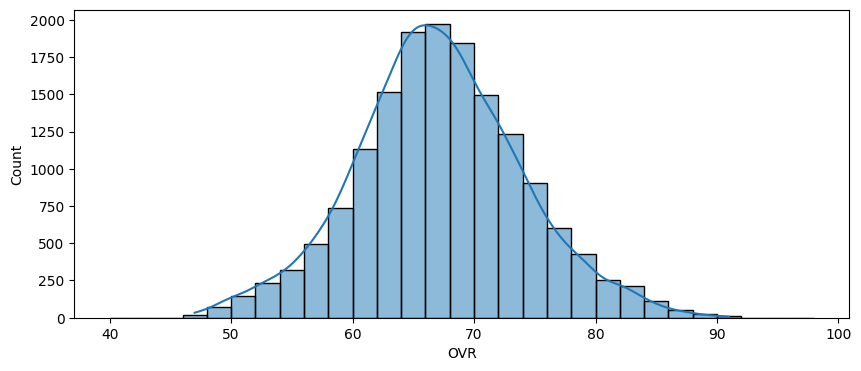

In [31]:
#Distribution based on OVR
bins = np.arange(40,100,2)
plt.figure(figsize=(10, 4))
sns.histplot(data = all_data, x='OVR', bins=bins, kde=True)
plt.show()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_23565/1783981588.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_23565/1783981588.py:20: UserWarning:

The palette list has more values (12) than needed (11), which may not be intended.



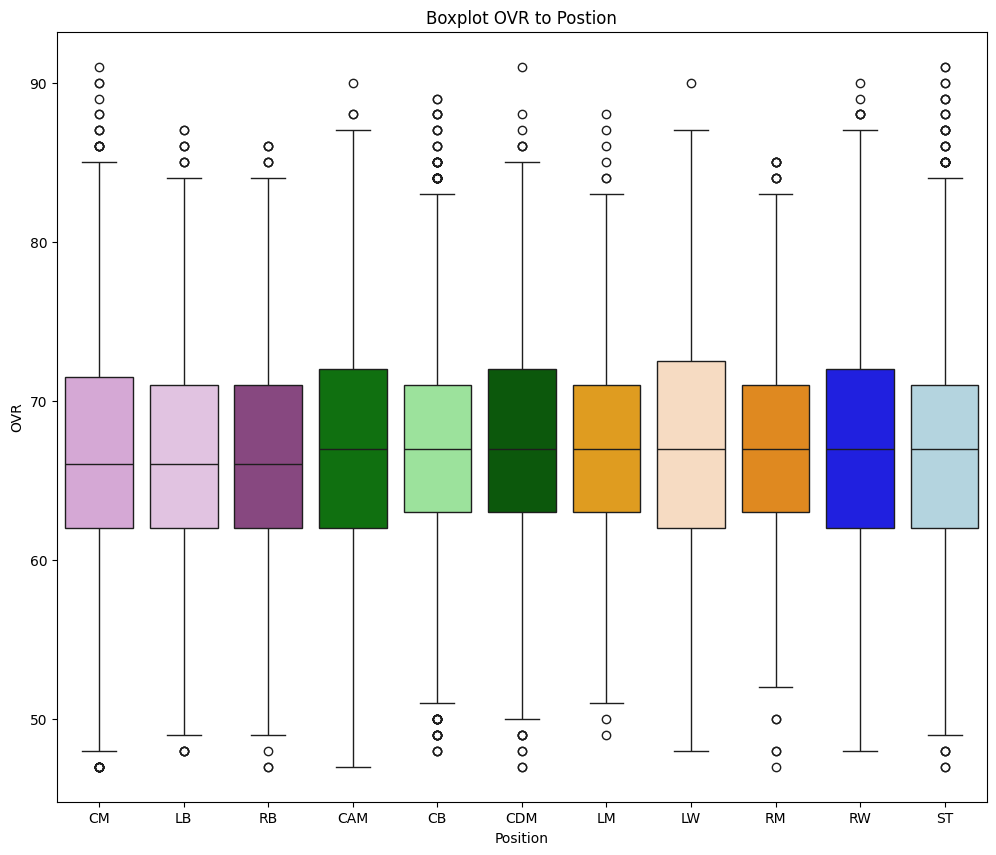

In [32]:
#Boxplot positions
palette = [
    (221/255, 160/255, 221/255),  # plum
    (230/255, 190/255, 230/255),  # light plum
    (145/255, 61/255, 136/255),   # deep plum
    (0/255, 128/255, 0/255),      # green
    (144/255, 238/255, 144/255),  # light green
    (0/255, 100/255, 0/255),      # dark green
    (255/255, 165/255, 0/255),    # orange
    (255/255, 218/255, 185/255),  # peach
    (255/255, 140/255, 0/255),    # dark orange
    (0/255, 0/255, 255/255),      # blue
    (173/255, 216/255, 230/255),  # light blue
    (255/255, 0/255, 0/255)       # red
]

plt.figure(figsize=(12,10))
position = all_data.groupby('Position')['OVR'].median().sort_values().index

sns.boxplot(x='Position', y='OVR', data = all_data, order=position, palette=palette)
plt.title('Boxplot OVR to Postion')
plt.show()


In [33]:
import pycountry

input_countries = all_data['Nation']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
all_data['Codes'] = codes
all_data['Codes'].replace('Unknown code', 'NaN', inplace=True)

all_data['Label'] = all_data['Name'] + ", " + all_data['Codes']
all_data

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_23565/2483875992.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team,Codes,Label
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid,FRA,"Kylian Mbappé, FRA"
1,2,Rodri,91,66,80,86,84,87,85,65,...,CDM,4,3,Right,28,Spain,Premier League,Manchester City,ESP,"Rodri, ESP"
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,ST,3,3,Left,24,Norway,Premier League,Manchester City,NOR,"Erling Haaland, NOR"
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid,NaN,"Jude Bellingham, NaN"
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid,BRA,"Vini Jr., BRA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,ST,3,2,Right,18,England,Barclays WSL,Spurs,NaN,"Araya Dennis, NaN"
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,LW,3,2,Right,22,Spain,Liga F,Granada CF,ESP,"Alexia Férnandez, ESP"
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,CM,4,4,Right,23,United States,Scottish Women's League,Glasgow City FC,USA,"Aleigh Gambone, USA"
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,CM,3,2,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich,CHE,"Joy Lysser, CHE"


In [34]:
all_data.columns

Index(['Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing',
       'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot',
       'Age', 'Nation', 'League', 'Team', 'Codes', 'Label'],
      dtype='object')

In [35]:
#Top 20 speed
speed_data = all_data[['Label', 'Position', 'Team', 'PAC','Acceleration', 'Sprint Speed']]
speed_data = speed_data.sort_values('PAC', ascending=False)[:20]
speed_data

,Label,Position,Team,PAC,Acceleration,Sprint Speed
0,"Kylian Mbappé, FRA",ST,Real Madrid,97,97,97
462,"Karim Adeyemi, DEU",LM,Borussia Dortmund,96,96,96
1954,"Yankuba Minteh, GMB",RM,Brighton,95,94,95
32,"Theo Hernández, FRA",LB,Milano FC,95,95,95
140,"Moussa Diaby, FRA",RM,Al Ittihad,95,95,95
214,"Alphonso Davies, CAN",LB,FC Bayern München,95,96,95
4,"Vini Jr., BRA",LW,Real Madrid,95,95,95
16415,"Rosemonde Kouassi, CIV",RM,Washington Spirit,94,94,94
3193,"Kevin Schade, DEU",LW,Brentford,94,93,94
6042,"Nestory Irankunda, AUS",RM,FC Bayern München,94,95,94


In [36]:
fig = go.Figure()


fig.add_trace(
    go.Bar(
        x=speed_data['Label'],
        y=speed_data['PAC'],
        name="Player PAC",
        marker_color=speed_data['PAC'] 
    )
)
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="PAC",
                    method="update",
                    args=[
                        {"y": [speed_data['PAC']]},
                        {"marker.color": [speed_data['PAC']]}  
                    ]
                ),
                dict(
                    label="Acceleration",
                    method="update",
                    args=[
                        {"y": [speed_data['Acceleration']]},
                        {"marker.color": [speed_data['Acceleration']]} 
                    ]
                ),
                dict(
                    label="Sprint Speed",
                    method="update",
                    args=[
                        {"y": [speed_data['Sprint Speed']]},
                        {"marker.color": [speed_data['Sprint Speed']]} 
                   ]
                )
            ])
        )
    ]
)

fig.update_layout(
    title="Player PACE Comparison",        
    xaxis_title="Players",                 
    yaxis_title="Stat Values",             
    title_font=dict(size=24),              
    xaxis=dict(title_font=dict(size=18)),  
    yaxis=dict(title_font=dict(size=18))   
)

# Show the figure
fig.show()               

In [37]:
all_data.columns

Index(['Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing',
       'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot',
       'Age', 'Nation', 'League', 'Team', 'Codes', 'Label'],
      dtype='object')

In [38]:
shoot_data = all_data[['Label', 'Position', 'Team', 'SHO', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties']]
shoot_data = shoot_data.sort_values('SHO', ascending=False)[:20]
shoot_data

,Label,Position,Team,SHO,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties
6,"Harry Kane, NaN",ST,FC Bayern München,93,94,95,94,89,89,93
2,"Erling Haaland, NOR",ST,Manchester City,92,96,96,94,83,90,90
0,"Kylian Mbappé, FRA",ST,Real Madrid,90,93,94,90,83,84,84
16166,"Ada Hegerberg, NOR",ST,OL,89,93,91,85,86,90,84
38,"Heung Min Son, NaN",ST,Spurs,89,91,90,89,89,83,75
16162,"Alexia Putellas, ESP",CM,FC Barcelona,89,91,91,86,89,90,89
16164,"Sam Kerr, AUS",ST,Chelsea,88,92,92,85,85,92,71
45,"Cristiano Ronaldo, PRT",ST,Al Nassr,88,90,87,92,85,83,90
19,"Robert Lewandowski, POL",ST,FC Barcelona,88,90,90,89,82,86,90
17,"Antoine Griezmann, FRA",ST,Atlético de Madrid,88,90,90,85,87,86,79


In [40]:
fig = px.scatter_3d(shoot_data, 
                    x='Finishing', 
                    y='Shot Power', 
                    z='Long Shots', 
                    color='Position',
                    title='3D Skill Distribution by Player Position',
                    size='Finishing',  
                    hover_data=['Finishing', 'Shot Power', 'Long Shots', 'Position'],  
                    color_discrete_sequence=px.colors.qualitative.Bold)  

fig.update_traces(marker=dict(size=8, opacity=0.8), selector=dict(mode='markers'))

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Finishing', backgroundcolor="rgb(230, 230, 230)", gridcolor="white", showbackground=True),
        yaxis=dict(title='Shot Power', backgroundcolor="rgb(230, 230, 230)", gridcolor="white", showbackground=True),
        zaxis=dict(title='Long Shots', backgroundcolor="rgb(230, 230, 230)", gridcolor="white", showbackground=True),
    ),
    scene_aspectmode='cube',  
    margin=dict(l=0, r=0, b=0, t=40),  
    title=dict(x=0.5), 
    showlegend=True
)

fig.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Parallel Coordinates Plot

In [ ]:
fig = px.parallel_coordinates(shoot_data, color='SHO', dimensions=['Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties'])
fig.show()

In [ ]:
top10 = all_data.League.value_counts()[:10]
top10 = pd.DataFrame(top10)
top10

,count
League,
Sudamericana,826
MLS,762
EFL Championship,683
EFL League One,615
Premier League,597
Libertadores,574
EFL League Two,562
Serie A Enilive,537
LALIGA EA SPORTS,529


<Axes: xlabel='count', ylabel='League'>

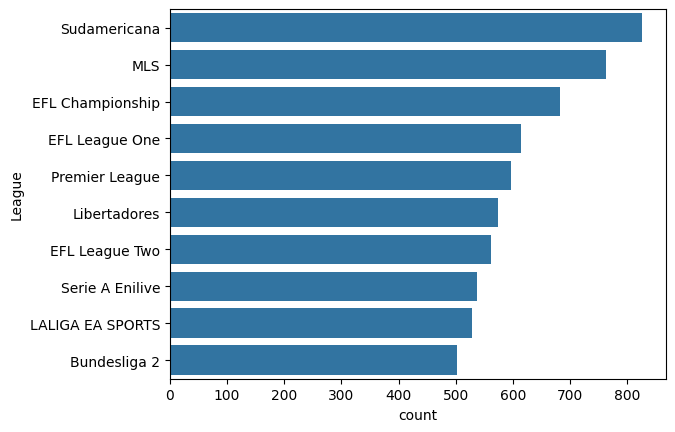

In [ ]:
sns.barplot(top10, x ='count', y=top10.index)

Groupby 

In [ ]:
teams = all_data.groupby('Team')
len(teams)

685

In [ ]:
real = teams.get_group('Real Madrid')
real.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Codes,Label
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,FRA,"Kylian Mbappé, FRA"
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,NaN,"Jude Bellingham, NaN"
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,BRA,"Vini Jr., BRA"
10,16,Thibaut Courtois,89,85,89,76,90,46,88,42,...,Real Madrid,"1v1 Close Down+, Cross Claimer, Far Throw",https://www.ea.com/games/ea-sports-fc/ratings/...,85.0,89.0,76.0,88.0,90.0,BEL,"Thibaut Courtois, BEL"
20,32,Federico Valverde,88,88,82,84,84,80,84,84,...,Real Madrid,"Power Shot+, Long Ball Pass, Rapid, Relentless...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,URY,"Federico Valverde, URY"


In [ ]:
import pycountry

input_countries = real['Nation']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
real['Codes'] = codes
real['Codes'].replace('Unknown code', 'NaN', inplace=True)

real['Label'] = real['Name'] + ", " + real['Codes']
real

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_3472/3093121445.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_3472/3093121445.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/yk/fs7s5htj44b8ds6q

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Codes,Label
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,FRA,"Kylian Mbappé, FRA"
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,NaN,"Jude Bellingham, NaN"
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,BRA,"Vini Jr., BRA"
10,16,Thibaut Courtois,89,85,89,76,90,46,88,42,...,Real Madrid,"1v1 Close Down+, Cross Claimer, Far Throw",https://www.ea.com/games/ea-sports-fc/ratings/...,85.0,89.0,76.0,88.0,90.0,BEL,"Thibaut Courtois, BEL"
20,32,Federico Valverde,88,88,82,84,84,80,84,84,...,Real Madrid,"Power Shot+, Long Ball Pass, Rapid, Relentless...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,URY,"Federico Valverde, URY"
24,40,Antonio Rüdiger,88,82,55,73,70,86,86,71,...,Real Madrid,"Bruiser+, Acrobatic, Aerial, Block, Jockey",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,DEU,"Antonio Rüdiger, DEU"
48,72,Rodrygo,86,89,81,79,88,31,64,90,...,Real Madrid,"Dead Ball, Finesse Shot, Flair, Technical",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,BRA,"Rodrygo, BRA"
52,77,Luka Modrić,86,72,76,88,87,71,64,75,...,Real Madrid,"Trivela+, Incisive Pass, Long Ball Pass, Techn...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,HRV,"Luka Modrić, HRV"
54,81,Carvajal,86,81,58,79,81,81,79,82,...,Real Madrid,"Block, Whipped Pass",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,ESP,"Carvajal, ESP"
65,101,David Alaba,85,79,71,83,80,85,77,78,...,Real Madrid,"Anticipate, Dead Ball, Long Ball Pass",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,AUT,"David Alaba, AUT"


In [ ]:
import plotly.graph_objects as go
real['Label'] = real['Name'] + " " + real['Codes']

fig = go.Figure()

# Add bar plot for the default stat (e.g., OVR)
fig.add_trace(
    go.Bar(
        x=real['Label'],
        y=real['OVR'],
        name="Player OVR",
        marker_color=real['OVR']  # Color mapped to the values
    )
)

# Add updatemenus for switching between different stats for the bar plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="OVR",
                    method="update",
                    args=[
                        {"y": [real['OVR']]},  # Update y for OVR
                        {"marker.color": [real['OVR']]}  # Update color based on OVR values
                    ]
                ),
                dict(
                    label="SHO",
                    method="update",
                    args=[
                        {"y": [real['SHO']]},  # Update y for SHO
                        {"marker.color": [real['SHO']]}  # Update color based on SHO values
                    ]
                ),
                dict(
                    label="PAS",
                    method="update",
                    args=[
                        {"y": [real['PAS']]},  # Update y for PAS
                        {"marker.color": [real['PAS']]}  # Update color based on PAS values
                    ]
                ),
                dict(
                    label="DRI",
                    method="update",
                    args=[
                        {"y": [real['DRI']]},  # Update y for DRI
                        {"marker.color": [real['DRI']]}  # Update color based on DRI values
                    ]
                ),
                dict(
                    label="DEF",
                    method="update",
                    args=[
                        {"y": [real['DEF']]},  # Update y for DEF
                        {"marker.color": [real['DEF']]}  # Update color based on DEF values
                    ]
                ),
                dict(
                    label="PHY",
                    method="update",
                    args=[
                        {"y": [real['PHY']]},  # Update y for PHY
                        {"marker.color": [real['PHY']]}  # Update color based on PHY values
                    ]
                )
            ])
        )
    ]
)

# Update layout with titles, x-axis, and y-axis labels
fig.update_layout(
    title="Player Stats Comparison",        # Title of the chart
    xaxis_title="Players",                  # X-axis label
    yaxis_title="Stat Values",              # Y-axis label
    title_font=dict(size=24),               # Customize title font size
    xaxis=dict(title_font=dict(size=18)),   # Customize x-axis title font size
    yaxis=dict(title_font=dict(size=18))    # Customize y-axis title font size
)

# Show the figure
fig.show()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_3472/1606036323.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
league_club = all_data.groupby(['League', 'Team'])

In [ ]:
nation = all_data.groupby(by=['Nation'])
nation.size()

Nation
Albania                 55
Algeria                 63
Andorra                  1
Angola                  27
Antigua and Barbuda      3
                      ... 
Vanuatu                  1
Venezuela              108
Wales                  156
Zambia                  13
Zimbabwe                12
Length: 154, dtype: int64